In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Data Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Split into Dependent and Independent Variables
X = data.drop('Spending Score (1-100)', axis=1)
y = data['Spending Score (1-100)']

# Performing Elbow method

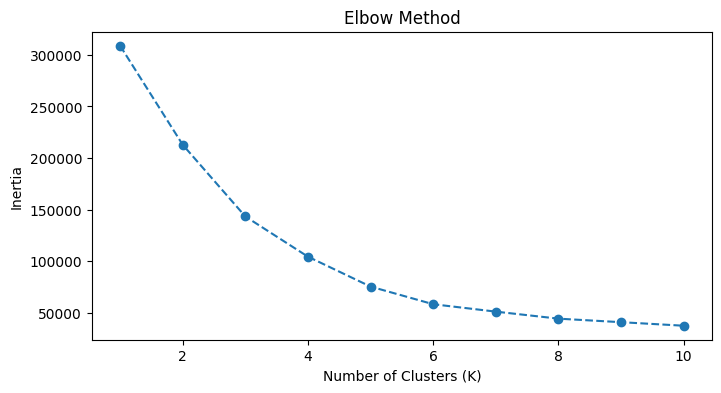

In [6]:
# Select the relevant features for clustering (Age, Annual Income, Spending Score)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Fit K-Means for a range of K values (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X)  # Fit the model with the 2D data (features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal K
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# As we didnt get the optimal k as we cannot observe elbow point we do silhouette method

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Find the K with the highest Silhouette Score
# Add 2 to account for starting from K=2
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal K:", best_k)

Optimal K: 6


In [8]:
# Initialize and fit K-Means with K=6
kmeans = KMeans(n_clusters=6,n_init = 10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# View the resulting clusters for each customer
print(data[['CustomerID', 'Cluster']])


     CustomerID  Cluster
0             1        0
1             2        3
2             3        0
3             4        3
4             5        0
..          ...      ...
195         196        1
196         197        5
197         198        1
198         199        5
199         200        1

[200 rows x 2 columns]


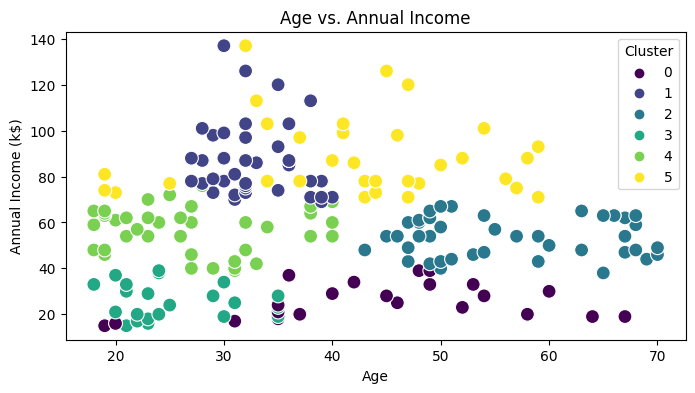

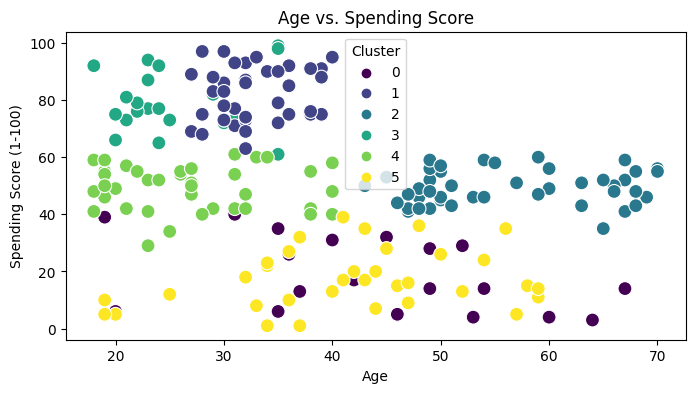

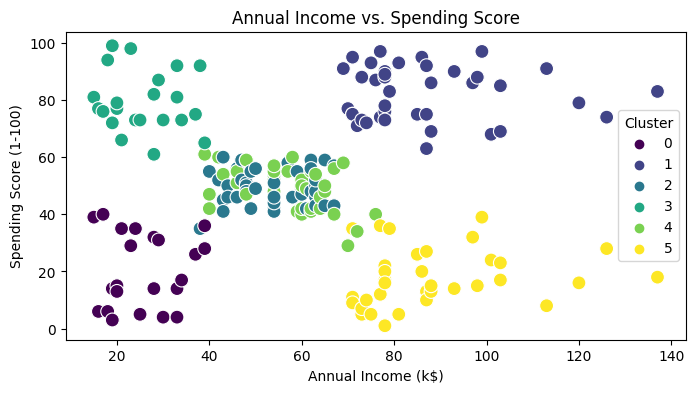

In [9]:
# Create a scatter plot for Age vs. Annual Income
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Create a scatter plot for Age vs. Spending Score
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Create a scatter plot for Annual Income vs. Spending Score
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()